<a href="https://colab.research.google.com/github/guluzar-gb/churn_ANN/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_GGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

>>Goal is to make an Artificial Neural Network that can predict, based on geo-demographical and transactional information given above, if any individual customer will leave the bank or stay (customer churn). Also, rank all the customers of the bank, based on their probability of leaving.

# Improt Libraries & Data

In [1]:
!pip install scikit-plot
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.

In [2]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy


In [3]:
df_raw= pd.read_csv("Churn_Modelling.csv", encoding="ISO-8859-1")
df_raw

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df=df_raw.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
from skimpy import clean_columns


In [7]:
df = clean_columns(df)

In [8]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [9]:
# missing values
df.isnull().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [10]:
#duplicate values
df.duplicated().sum()

0

In [11]:
df.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['surname', 'geography', 'gender']
['row_number', 'customer_id', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']


In [13]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())

surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
gender
Male      5457
Female    4543
Name: count, dtype: int64


In [14]:
# Converting 'Geography' and 'Gender' column
geography_n = pd.get_dummies(df['geography'], drop_first=True)
gender_n = pd.get_dummies(df['gender'], drop_first=True)

In [21]:
print(geography_n.columns)

Index(['Germany', 'Spain'], dtype='object')


In [22]:
print(gender_n.columns)

Index(['Male'], dtype='object')


In [15]:
# Appending columns to original dataframe
df = pd.concat([df, geography_n, gender_n], axis=1)
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

In [16]:
#dropping the unused ones after feature eng
df.drop(['geography', 'gender'], axis=1, inplace=True)

In [17]:
#dropping unnecessary columns
df.drop(['row_number','customer_id','surname'], axis=1, inplace=True)

In [18]:
df.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'Germany', 'Spain', 'Male'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


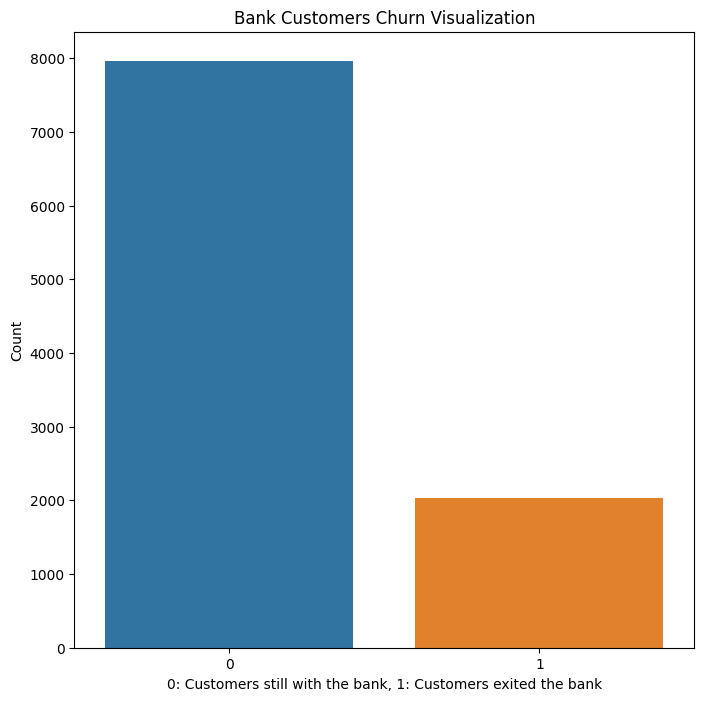

In [ ]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
# independent feature x: exited
#rest: labels

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('exited', axis=1)
y = df['exited']

In [29]:
# Splitting the data into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8500, 11), X_test size: (1500, 11)


In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

# Modelling & Model Performance

In [33]:
!pip install livelossplot

In [40]:
# Importing the tensor and Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
#from sklearn.model_selection import GridSearchCV

In [38]:
X_train.shape

(8500, 11)

In [39]:
X_test.shape

(1500, 11)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [37]:
# Initialising the ANN
model = Sequential()

In [55]:
model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [56]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=150, epochs=100, verbose=1)

Epoch 1/100
51/51 [==============================] - 2s 8ms/step - loss: 0.6411 - accuracy: 0.7940 - val_loss: 0.5676 - val_accuracy: 0.8282
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.7940 - val_loss: 0.4173 - val_accuracy: 0.8282
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.8671 - val_loss: 0.3500 - val_accuracy: 0.8659
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8703 - val_loss: 0.3445 - val_accuracy: 0.8647
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8685 - val_loss: 0.3453 - val_accuracy: 0.8600
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8698 - val_loss: 0.3442 - val_accuracy: 0.8612
Epoch 7/100
51/51 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.8724 - val_loss: 0.3454 - val_accuracy: 0.8588
Epoch 8/100
5

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 108       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
 dense_4 (Dense)             (None, 18)                36        
                                                                 
 dense_5 (Dense)             (None, 18)                342       
                                                                 
 dense_6 (Dense)             (None, 9)                

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.641068,0.793987,0.567598,0.828235
1,0.505361,0.793987,0.417273,0.828235
2,0.380845,0.867059,0.350001,0.865882
3,0.338919,0.870327,0.344544,0.864706
4,0.327642,0.868497,0.345275,0.860000


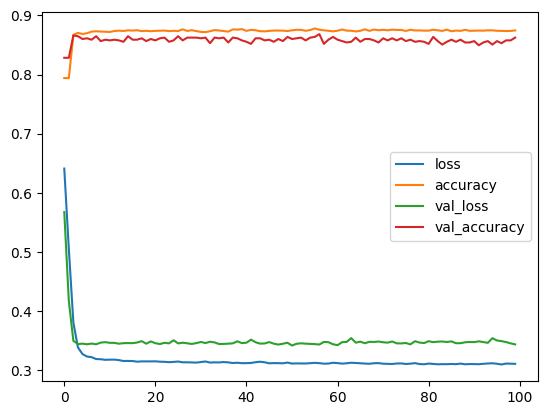

In [59]:
loss_df.plot()
plt.show()
#overfitting problem

In [60]:
model.evaluate(X_test, y_test, verbose=0)

[0.33977463841438293, 0.8700000047683716]

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.33977463841438293
accuracy:  0.8700000047683716


In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[1124   61]
 [ 134  181]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1185
           1       0.75      0.57      0.65       315

    accuracy                           0.87      1500
   macro avg       0.82      0.76      0.79      1500
weighted avg       0.86      0.87      0.86      1500



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [52]:
model_history=model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=150, epochs=300, verbose=1)

Epoch 1/300
51/51 [==============================] - 0s 4ms/step - loss: 0.3221 - accuracy: 0.8685 - val_loss: 0.3274 - val_accuracy: 0.8671
Epoch 2/300
51/51 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8701 - val_loss: 0.3259 - val_accuracy: 0.8682
Epoch 3/300
51/51 [==============================] - 0s 5ms/step - loss: 0.3217 - accuracy: 0.8678 - val_loss: 0.3260 - val_accuracy: 0.8659
Epoch 4/300
51/51 [==============================] - 1s 12ms/step - loss: 0.3215 - accuracy: 0.8707 - val_loss: 0.3273 - val_accuracy: 0.8682
Epoch 5/300
51/51 [==============================] - 0s 4ms/step - loss: 0.3217 - accuracy: 0.8680 - val_loss: 0.3260 - val_accuracy: 0.8694
Epoch 6/300
51/51 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.8695 - val_loss: 0.3263 - val_accuracy: 0.8671
Epoch 7/300
51/51 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8690 - val_loss: 0.3266 - val_accuracy: 0.8682
Epoch 8/300


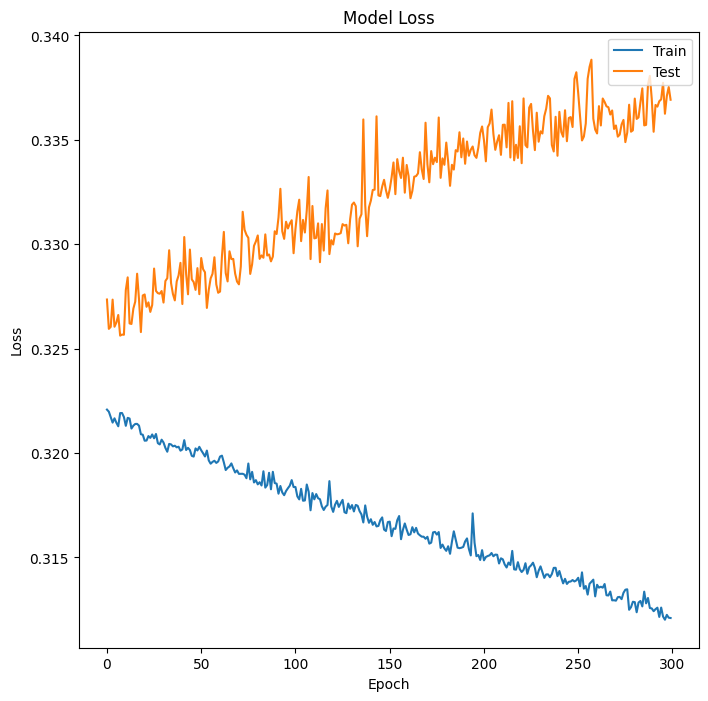

In [63]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
model = Sequential()

model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [65]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [68]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=15,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],)

Epoch 1/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8627 - val_loss: 0.3224 - val_accuracy: 0.8682
Epoch 2/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8613 - val_loss: 0.3228 - val_accuracy: 0.8682
Epoch 3/1000
510/510 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8637 - val_loss: 0.3295 - val_accuracy: 0.8647
Epoch 4/1000
510/510 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8629 - val_loss: 0.3272 - val_accuracy: 0.8647
Epoch 5/1000
510/510 [==============================] - 2s 4ms/step - loss: 0.3335 - accuracy: 0.8605 - val_loss: 0.3289 - val_accuracy: 0.8576
Epoch 6/1000
510/510 [==============================] - 3s 5ms/step - loss: 0.3314 - accuracy: 0.8655 - val_loss: 0.3270 - val_accuracy: 0.8624
Epoch 7/1000
510/510 [==============================] - 2s 4ms/step - loss: 0.3308 - accuracy: 0.8642 - val_loss: 0.3280 - val_accuracy:

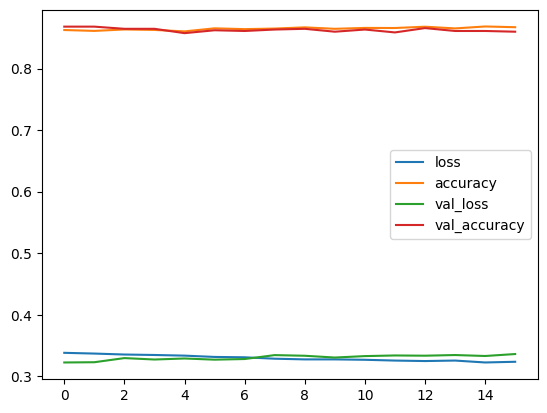

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [70]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.341411828994751
accuracy:  0.8560000061988831


In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1104   81]
 [ 135  180]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1185
           1       0.69      0.57      0.62       315

    accuracy                           0.86      1500
   macro avg       0.79      0.75      0.77      1500
weighted avg       0.85      0.86      0.85      1500



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [ ]:
#using learing rate

In [72]:
from tensorflow.keras.optimizers import Adam

In [74]:
model = Sequential()

model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [76]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [77]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=15,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.4875 - accuracy: 0.7877 - val_loss: 0.3939 - val_accuracy: 0.8424
Epoch 2/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8256 - val_loss: 0.3712 - val_accuracy: 0.8553
Epoch 3/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.3873 - accuracy: 0.8420 - val_loss: 0.3437 - val_accuracy: 0.8553
Epoch 4/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8569 - val_loss: 0.3287 - val_accuracy: 0.8671
Epoch 5/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8573 - val_loss: 0.3283 - val_accuracy: 0.8635
Epoch 6/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8554 - val_loss: 0.3237 - val_accuracy: 0.8682
Epoch 7/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8580 - val_loss: 0.3217 - val_accuracy:

<Axes: >

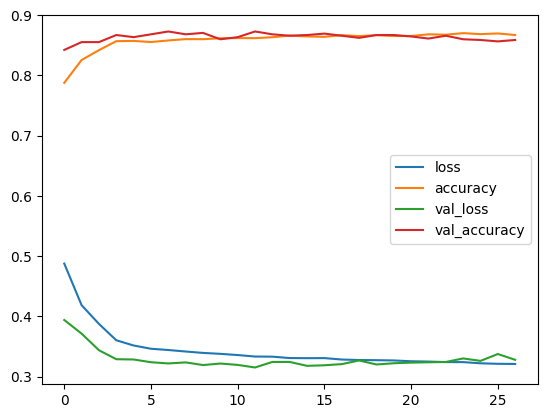

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

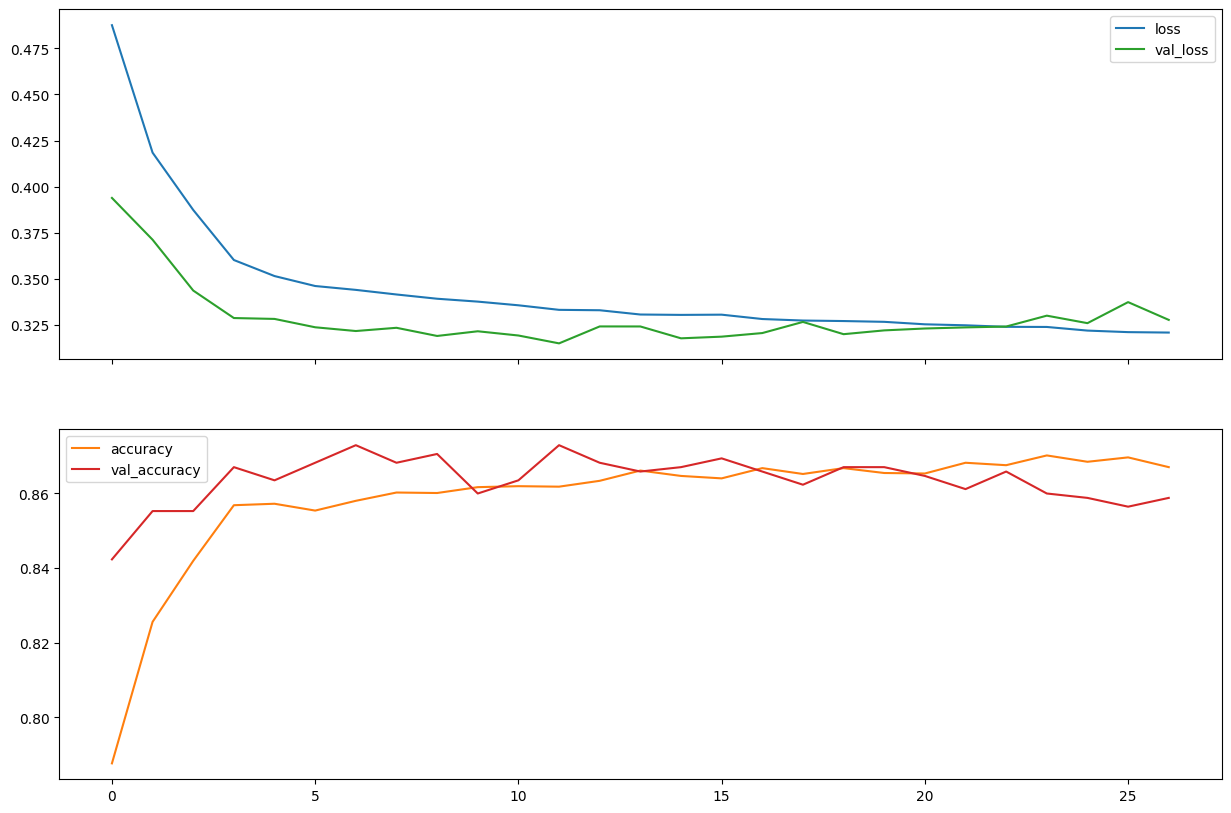

In [79]:
loss_df.plot(subplots=[['loss','val_loss'],['accuracy','val_accuracy']],layout=(2,1),figsize=(15,10));

In [80]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3366398215293884
accuracy:  0.8566666841506958


In [81]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1132   53]
 [ 162  153]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1185
           1       0.74      0.49      0.59       315

    accuracy                           0.86      1500
   macro avg       0.81      0.72      0.75      1500
weighted avg       0.85      0.86      0.84      1500



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [82]:
from tensorflow.keras.layers import Dropout

In [83]:
model = Sequential()

model.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [84]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=15, epochs=1000, verbose=1
)

Epoch 1/1000
510/510 [==============================] - 3s 4ms/step - loss: 0.5936 - accuracy: 0.7571 - val_loss: 0.4738 - val_accuracy: 0.8282
Epoch 2/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.7932 - val_loss: 0.4499 - val_accuracy: 0.8282
Epoch 3/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.5133 - accuracy: 0.7939 - val_loss: 0.4361 - val_accuracy: 0.8282
Epoch 4/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.7940 - val_loss: 0.4338 - val_accuracy: 0.8282
Epoch 5/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.4927 - accuracy: 0.7941 - val_loss: 0.4198 - val_accuracy: 0.8282
Epoch 6/1000
510/510 [==============================] - 1s 3ms/step - loss: 0.4914 - accuracy: 0.7936 - val_loss: 0.4182 - val_accuracy: 0.8282
Epoch 7/1000
510/510 [==============================] - 1s 2ms/step - loss: 0.4801 - accuracy: 0.7932 - val_loss: 0.4065 - val_accuracy:

In [88]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.34563833475112915
accuracy:  0.8546666502952576


In [89]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[1168   17]
 [ 201  114]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1185
           1       0.87      0.36      0.51       315

    accuracy                           0.85      1500
   macro avg       0.86      0.67      0.71      1500
weighted avg       0.86      0.85      0.83      1500



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [90]:
model.save("model_churn_ANN_1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
!pip install scikeras

In [92]:
from scikeras.wrappers import KerasClassifier
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [93]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=36, activation="relu", input_dim=X_train.shape[1]))
    classifier.add(Dense(units=18, activation="relu"))
    classifier.add(Dense(units=9, activation="relu"))
    classifier.add(Dense(units=1, activation="sigmoid"))
    classifier.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
    )
    return classifier

In [94]:
X_train.shape

(8500, 11)

In [95]:
y_train.shape

(8500,)

In [96]:
classifier_model = KerasClassifier(
    model=build_classifier, batch_size=15, epochs=100, verbose=0
)

scores = cross_validate(
    estimator=classifier_model,
    X=X_train,
    y=y_train,
    scoring=["accuracy", "precision", "recall", "f1"],
    cv=10,
)

df_scores = pd.DataFrame(scores, index=range(1, 11)).iloc[:, 2:]

df_scores

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

,test_accuracy,test_precision,test_recall,test_f1
1,0.845882,0.641892,0.549133,0.591900
2,0.838824,0.632353,0.497110,0.556634
3,0.845882,0.633987,0.563953,0.596923
4,0.844706,0.681818,0.436047,0.531915
5,0.847059,0.661538,0.500000,0.569536
6,0.845882,0.664000,0.482558,0.558923
7,0.845882,0.656489,0.500000,0.567657
8,0.841176,0.617834,0.563953,0.589666
9,0.836471,0.625954,0.476744,0.541254
10,0.831765,0.621849,0.430233,0.508591


In [97]:
df_scores_summary = pd.DataFrame(
    {"score_mean": df_scores.mean().values, "score_std": df_scores.std().values},
    index=["acc", "pre", "rec", "f1"],
)

df_scores_summary

,score_mean,score_std
acc,0.842353,0.005143
pre,0.643771,0.021173
rec,0.499973,0.047615
f1,0.561300,0.028263


In [98]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.6 MB/s eta 0:00:00


In [99]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [100]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [101]:
trial_metric = "accuracy"
batch_size = 50


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model

In [102]:
def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [103]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-11-13 20:46:49,256] A new study created in memory with name: no-name-eb07a442-d216-4ccc-9098-165deb0f9aab
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type type.
  w

Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-11-13 20:46:55,167] Trial 0 finished with value: 0.590666651725769 and parameters: {'n_units1': 51, 'n_units2': 94, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 7.831689120035924e-05, 'w0': 0.2676696485336211, 'w1': 1.3270887325978418}. Best is trial 0 with value: 0.590666651725769.


Restoring model weights from the end of the best epoch: 54.
Epoch 69: early stopping


[I 2023-11-13 20:47:36,898] Trial 1 finished with value: 0.8519999980926514 and parameters: {'n_units1': 49, 'n_units2': 51, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0016963385349496446, 'w0': 2.478663981653569, 'w1': 0.14088168909853488}. Best is trial 1 with value: 0.8519999980926514.
[I 2023-11-13 20:48:06,378] Trial 2 finished with value: 0.5213333368301392 and parameters: {'n_units1': 13, 'n_units2': 82, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 7.394683852928615e-05, 'w0': 3.096750212804298, 'w1': 3.7934603082673815}. Best is trial 1 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-11-13 20:48:18,295] Trial 3 finished with value: 0.8146666884422302 and parameters: {'n_units1': 117, 'n_units2': 107, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00033815415338216354, 'w0': 1.55265213917623, 'w1': 0.11113688498438266}. Best is trial 1 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-11-13 20:48:25,956] Trial 4 finished with value: 0.8560000061988831 and parameters: {'n_units1': 23, 'n_units2': 22, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.021709509232998254, 'w0': 0.01782405961246349, 'w1': 0.03676316222847387}. Best is trial 4 with value: 0.8560000061988831.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-11-13 20:48:31,811] Trial 5 finished with value: 0.5933333039283752 and parameters: {'n_units1': 88, 'n_units2': 123, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.019920280276984767, 'w0': 0.017840630324231253, 'w1': 0.20480069473118487}. Best is trial 4 with value: 0.8560000061988831.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-11-13 20:48:42,655] Trial 6 finished with value: 0.8420000076293945 and parameters: {'n_units1': 106, 'n_units2': 20, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0006432238902634455, 'w0': 1.8994457363388229, 'w1': 4.383893879980222}. Best is trial 4 with value: 0.8560000061988831.


Restoring model weights from the end of the best epoch: 42.
Epoch 57: early stopping


[I 2023-11-13 20:48:59,620] Trial 7 finished with value: 0.6226666569709778 and parameters: {'n_units1': 80, 'n_units2': 25, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.007628386566981058, 'w0': 0.029174349949230308, 'w1': 0.9217045190046546}. Best is trial 4 with value: 0.8560000061988831.
[I 2023-11-13 20:49:41,314] Trial 8 finished with value: 0.859333336353302 and parameters: {'n_units1': 47, 'n_units2': 63, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.03796040036070668, 'w0': 1.2930900191909172, 'w1': 0.8119674485100936}. Best is trial 8 with value: 0.859333336353302.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-11-13 20:49:52,263] Trial 9 finished with value: 0.640666663646698 and parameters: {'n_units1': 86, 'n_units2': 92, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 9.19000002946323e-05, 'w0': 0.024894403217084294, 'w1': 0.5680725046418708}. Best is trial 8 with value: 0.859333336353302.


{'n_units1': 47,
 'n_units2': 63,
 'optimizer': keras.src.optimizers.adadelta.Adadelta,
 'learning_rate': 0.03796040036070668,
 'w0': 1.2930900191909172,
 'w1': 0.8119674485100936}

In [105]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=30,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
153/153 [==============================] - 2s 5ms/step - loss: 0.6705 - recall: 0.3242 - val_loss: 0.6086 - val_recall: 0.0548
Epoch 2/100
153/153 [==============================] - 1s 4ms/step - loss: 0.5848 - recall: 0.0127 - val_loss: 0.5342 - val_recall: 0.0000e+00
Epoch 3/100
153/153 [==============================] - 1s 4ms/step - loss: 0.5365 - recall: 0.0000e+00 - val_loss: 0.4906 - val_recall: 0.0000e+00
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 0.5086 - recall: 0.0000e+00 - val_loss: 0.4648 - val_recall: 0.0000e+00
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4911 - recall: 0.0000e+00 - val_loss: 0.4487 - val_recall: 0.0000e+00
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4790 - recall: 0.0000e+00 - val_loss: 0.4379 - val_recall: 0.0000e+00
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 0.4699 - recall: 0.0000e+00 - val_loss: 0.4300 - val_re

In [106]:
history = model.history.history

In [107]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1137   48]
 [ 162  153]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1185
           1       0.76      0.49      0.59       315

    accuracy                           0.86      1500
   macro avg       0.82      0.72      0.75      1500
weighted avg       0.85      0.86      0.85      1500



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

47/47 [==============================] - 0s 1000us/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

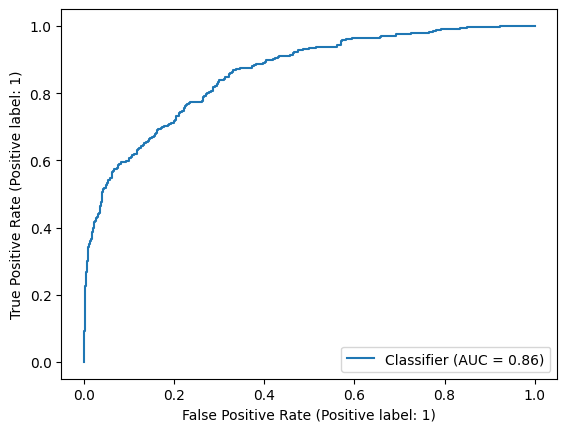

In [108]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [109]:
roc_auc_score(y_test, y_pred_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

0.8592806911794253

In [111]:
import pickle

pickle.dump(sc, open("scaler_churn", "wb"))

<Axes: >

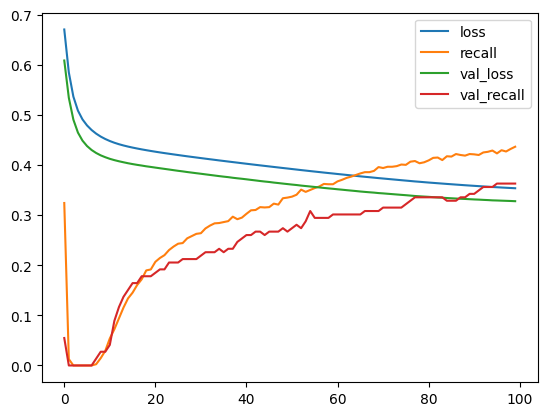

In [112]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [114]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3496435284614563
accuracy:  0.48571428656578064


In [115]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[1137   48]
 [ 162  153]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1185
           1       0.76      0.49      0.59       315

    accuracy                           0.86      1500
   macro avg       0.82      0.72      0.75      1500
weighted avg       0.85      0.86      0.85      1500



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [116]:
model.save("model_churn_01.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
from tensorflow.keras.models import load_model

In [118]:
model_churn = load_model("model_churn_01.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [119]:
single_customer = df.drop("exited", axis=1).iloc[0:1, :]
single_customer

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Germany,Spain,Male
0,619,42,2,0.0,1,1,1,101348.88,False,False,False


In [120]:
single_customer = scaler_churn.transform(single_customer)
single_customer

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([[-0.32805598,  0.30079902, -1.0300478 , -1.23173047, -0.90861481,
         0.64659474,  0.97398532,  0.02016907, -0.57590123, -0.5757201 ,
        -1.09561052]])

In [121]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 42ms/step


array([[0]], dtype=int32)

In [122]:
model_churn.predict(single_customer)

1/1 [==============================] - 0s 22ms/step


array([[0.31043893]], dtype=float32)

In [127]:
df["exited"].iloc[30]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___